Exp 1:  XOR Problem

In [ ]:
import tensorflow as tf
import numpy as np

# Define the XOR input and output data
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

# Define the deep feedforward neural network model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Train the model
model.fit(X,y,epochs=20000,verbose=0)

#Test the model
predictions=model.predict(X)
rounded_predictions=np.round(predictions)
print("Predictions:")
for data,prediction in zip(X,rounded_predictions):
  print(f"Input:{data} --> Prediction: {prediction}")

1/1 [==============================] - 0s 88ms/step
Predictions:
Input:[0 0] --> Prediction: [1.]
Input:[0 1] --> Prediction: [1.]
Input:[1 0] --> Prediction: [1.]
Input:[1 1] --> Prediction: [0.]


EXP 2 : Create a perceptron with appropriate number of inputs and outputs. Train it using fixed increment learning algorithm until no change in weights is required. Output the final weights

In [ ]:
import numpy as np
import tensorflow as tf

# Generate synthetic data for the perceptron training
np.random.seed(42)
num_samples = 100
input_dim = 2
output_dim = 1

# Generate random input data (2 features) and labels (0 or 1)
X = np.random.rand(num_samples, input_dim)
y = np.random.randint(2, size=(num_samples, output_dim))

# Create the perceptron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid')
])

# Define the fixed increment learning algorithm
def fixed_increment_learning(model, X, y, learning_rate=0.1, max_epochs=1000):
    # Convert numpy arrays to TensorFlow tensors
    X = tf.constant(X, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)

    # Initialize weights and biases randomly
    model.build()
    weights = model.trainable_weights[0]
    bias = model.trainable_weights[1]

    # Training loop
    for epoch in range(max_epochs):
        # Compute predictions and errors
        with tf.GradientTape() as tape:
            predictions = model(X)
            errors = y - predictions

        # Compute gradients and update weights and biases
        gradients = tape.gradient(errors, model.trainable_weights)
        weights.assign_add(learning_rate * gradients[0])
        bias.assign_add(learning_rate * gradients[1])

        # Check if weights have changed
        if tf.reduce_all(tf.math.equal(gradients[0], 0.0)) and tf.reduce_all(tf.math.equal(gradients[1], 0.0)):
            print(f"No change in weights after epoch {epoch + 1}")
            break

    return weights.numpy(), bias.numpy()

# Train the perceptron
final_weights, final_bias = fixed_increment_learning(model, X, y)

# Output the final weights and bias
print("Final weights:")
print(final_weights)
print("Final bias:")
print(final_bias)

Final weights:
[[-3.3363438]
 [-3.3806343]]
Final bias:
[-6.9015856]


EXP 3 Create Deep Feedforward Neural Network for digit classification using MNIST data set and plot the accuracy

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2669 - accuracy: 0.9214 - val_loss: 0.1338 - val_accuracy: 0.9609
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1106 - accuracy: 0.9661 - val_loss: 0.1209 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0754 - accuracy: 0.9766 - val_loss: 0.0971 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.1108 - val_accuracy: 0.9677
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0450 - accuracy: 0.9854 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0348 - accuracy: 0.9885 - val_loss: 0.1015 - val_accuracy: 0.9728
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step 

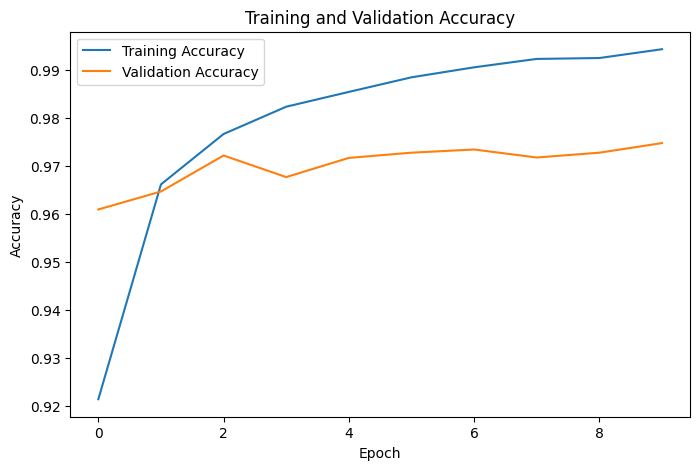

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 digits (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

# Plot the accuracy and loss during training
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

EXP 4: Create a Convolutional Neural Network model for image classification using CIFAR10 data set and plot the accuracy


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

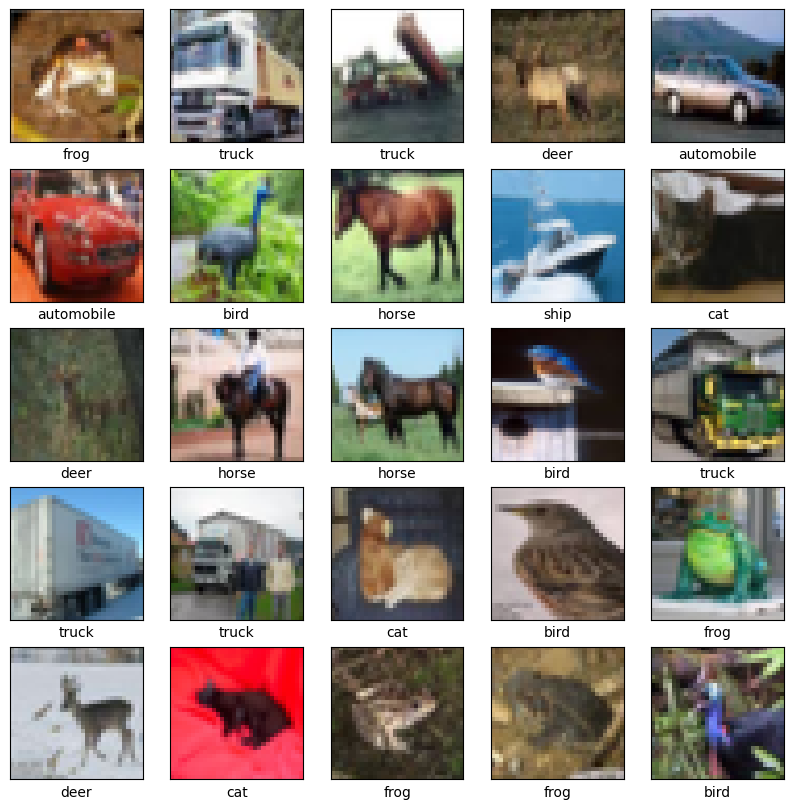

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5039 - accuracy: 0.4522 - val_loss: 1.2172 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1405 - accuracy: 0.5943 - val_loss: 1.0946 - val_accuracy: 0.6173
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9813 - accuracy: 0.6565 - val_loss: 0.9472 - val_accuracy: 0.6643
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8797 - accuracy: 0.6912 - val_loss: 0.8805 - val_accuracy: 0.6949
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8099 - accuracy: 0.7183 - val_loss: 0.8667 - val_accuracy: 0.6974
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7538 - accuracy: 0.7366 - val_loss: 0.8868 - val_accuracy: 0.6923
Epoch 7/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7033 - accuracy: 0.7510 - val_loss: 0.8602 -

313/313 - 4s - loss: 0.8569 - accuracy: 0.7163 - 4s/epoch - 12ms/step


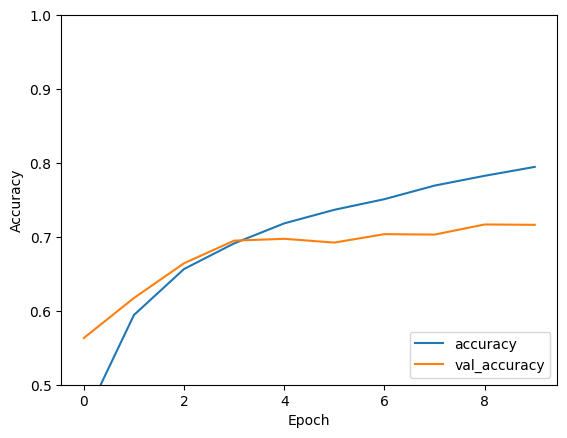

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)